In [17]:
import sys
import os

# Add the src directory to the Python path
sys.path.append(os.path.abspath(os.path.join('..', 'src')))
import pandas as pd
import numpy as np
import time
import sys
import os

from utils import download_data, fetch_urls, weighted_mean, get_max, is_same
from mappings import value_mapping


In [18]:
df = download_data("https://seshatdata.com/api/core/polities/?page_size=1000")
# create the dattaframe staring with the polity data
template = pd.DataFrame(columns = ["NGA", "PolityID", "PolityName"])
# specify the columns data types
template['PolityID'] = template['PolityID'].astype('int')

# polity_home_nga_id, polity_id, polity_name 
polityIDs = df.id.unique()

for polID in polityIDs:
    pol_df = df.loc[df.id == polID, ['home_nga_name', 'id', 'new_name','start_year','end_year']]
    # create a temporary dataframe with all data for current polity
    pol_df_new = pd.DataFrame(dict({"NGA" : pol_df.home_nga_name.values[0], 
                                    "PolityID": pol_df.id.values[0], 
                                    "PolityName": pol_df.new_name.values[0], 
                                    "StartYear": pol_df.start_year.values[0],
                                    "EndYear": pol_df.end_year.values[0]}), index = [0])

    # Ensure the index is unique before concatenating
    if not pol_df_new.index.is_unique:
        pol_df_new = pol_df_new.reset_index(drop=True)
    template = pd.concat([template, pol_df_new])
template.reset_index(drop=True, inplace=True)

Downloaded 839 rows


In [27]:
url = "https://seshatdata.com/api/crisisdb/power-transitions/"
df = download_data(url)

Downloaded 3449 rows


In [28]:
df_copy = df.copy()

In [29]:
PT_types = ['overturn', 'predecessor_assassination', 'intra_elite',
       'military_revolt', 'popular_uprising', 'separatist_rebellion',
       'external_invasion', 'external_interference']

In [31]:
for type in PT_types:
    df[type] = df[type].apply(lambda x: value_mapping[x] if x in value_mapping.keys() else np.nan)

In [34]:
# set nan values to 0
df.fillna(0, inplace=True)

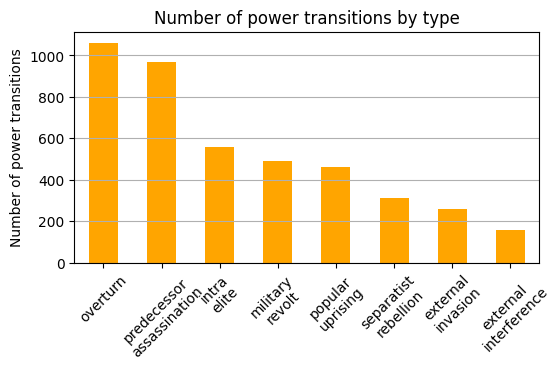

In [56]:
from matplotlib import pyplot as plt
labels = [pt.replace('_', '\n') for pt in PT_types]
fig, ax = plt.subplots(figsize=(6, 3))
# plot bar chart of the number of power transitions by type in ascending order
df[PT_types].sum().sort_values(ascending=False).plot(kind='bar', ax=ax, color='orange')
ax.grid(axis='y')
# rotate the x-axis labels
# plt.xticks(rotation=45)
plt.title("Number of power transitions by type")
plt.ylabel("Number of power transitions")
# change x axis labels
ax.set_xticklabels(labels, rotation=45)
plt.show()

Text(0, 0.5, 'Frequency')

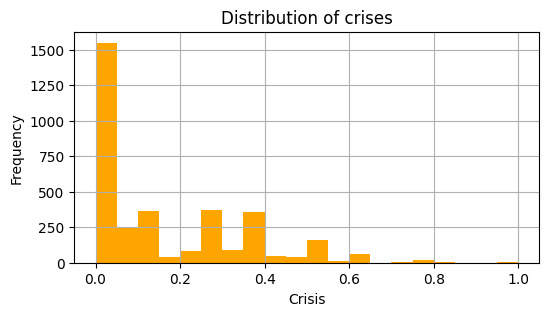

In [69]:
df['crisis'] = df[PT_types].sum(axis=1)/8
fig, ax = plt.subplots(figsize=(6, 3))
df.crisis.hist(bins=20, color='orange')
plt.title("Distribution of crises")
plt.xlabel("Crisis")
plt.ylabel("Frequency")


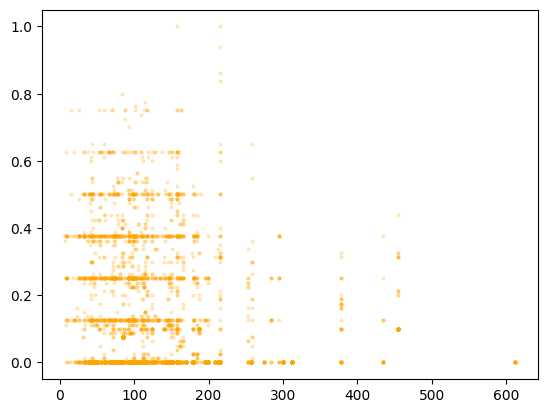

In [72]:
years = -(df.polity_start_year - df.polity_end_year)/2
plt.plot(years, df.crisis, 'o', color='orange', alpha=0.2, markersize=2)